# Proyek Analisis Data: Air-Quality-Dataset
- **Nama:** Sahal Maghfud
- **Email:** sahalcocgood@gmail.com
- **ID Dicoding:** sahal_maghfud_OuI7

## Menentukan Pertanyaan Bisnis

- Di antara stasiun Aotizhongxin,Changping,Dingling,Dongsi mana yang memiliki kualitas udara terburuk dalam satu tahun terakhir berdasarkan level PM2.5?
- Di bulan apa curah hujan paling tinggi terjadi  di stasiun Aotizhongxin,Changping,Dingling,Dongsi ?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Garthering data

In [5]:
data_Aotizhongxin_df = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data_Changping_df = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
data_Dingling_df = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
data_Dongsi_df = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')

-membaca semua data dari file csv

In [6]:
all_data_df = pd.concat([
    data_Aotizhongxin_df,
    data_Changping_df,
    data_Dingling_df,
    data_Dongsi_df,
])
all_data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin



- menggabungkan semua data menjadi satu karena semua data memiliki field yang sama

### Assessing Data

In [7]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137028 non-null  float64
 6   PM10     137747 non-null  float64
 7   SO2      137300 non-null  float64
 8   NO2      135731 non-null  float64
 9   CO       131750 non-null  float64
 10  O3       136055 non-null  float64
 11  TEMP     140110 non-null  float64
 12  PRES     140116 non-null  float64
 13  DEWP     140110 non-null  float64
 14  RAIN     140114 non-null  float64
 15  wd       139817 non-null  object 
 16  WSPM     140142 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 20.3+ MB


**Insight:**
- terdapat missing value pada column pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm

In [8]:
print("Jumlah duplikasi: ", all_data_df.duplicated().sum())
all_data_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,140256.000,140256.000000,140256.000000,140256.000000,140256.000000,137028.000000,137747.000000,137300.000000,135731.000000,131750.000000,136055.000000,140110.000000,140116.000000,140110.000000,140114.000000,140142.000000
mean,17532.500,2014.662560,6.522930,15.729637,11.500000,76.509469,99.699265,15.652207,46.184894,1161.187856,60.006053,13.657066,1009.979674,2.145698,0.063044,1.819224
std,10122.141,1.177201,3.448715,8.800123,6.922211,79.003869,90.144962,20.934323,34.182889,1122.798614,56.253474,11.397070,10.520088,13.802808,0.803161,1.278322
min,1.000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,8766.750,2014.000000,4.000000,8.000000,5.750000,18.000000,33.000000,3.000000,20.000000,500.000000,15.000000,3.300000,1001.400000,-9.400000,0.000000,1.000000
50%,17532.500,2015.000000,7.000000,16.000000,11.500000,51.000000,76.000000,7.711200,38.000000,800.000000,49.000000,14.600000,1009.600000,2.600000,0.000000,1.500000
75%,26298.250,2016.000000,10.000000,23.000000,17.250000,107.000000,139.000000,19.000000,66.000000,1400.000000,84.000000,23.300000,1018.300000,14.800000,0.000000,2.300000
max,35064.000,2017.000000,12.000000,31.000000,23.000000,898.000000,999.000000,341.000000,290.000000,10000.000000,1071.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


**Insight:**
- tidak terdapat duplikasi pada data
- ada data yang memiliki nilai max yang tidak wajar yaitu pada column pm2.5,pm10,o3 dan co

### Cleaning Data

##### Missing Value

In [9]:
median_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
mode_columns = ['RAIN',"wd"]

# Mengisi missing values dengan median untuk kolom median_columns
for col in median_columns:
    all_data_df[col].fillna(all_data_df[col].median(), inplace=True)

# Mengisi missing values dengan mode untuk kolom mode_columns
for col in mode_columns:
    all_data_df[col].fillna(all_data_df[col].mode()[0], inplace=True)


C:\Users\Sahal Maghfud\AppData\Local\Temp\ipykernel_32808\3952919593.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data_df[col].fillna(all_data_df[col].median(), inplace=True)
C:\Users\Sahal Maghfud\AppData\Local\Temp\ipykernel_32808\3952919593.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

mempertimbangkan adanya outlier pada data maka saya menggunakan median untuk mengisi missing value

In [10]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    140256 non-null  float64
 6   PM10     140256 non-null  float64
 7   SO2      140256 non-null  float64
 8   NO2      140256 non-null  float64
 9   CO       140256 non-null  float64
 10  O3       140256 non-null  float64
 11  TEMP     140256 non-null  float64
 12  PRES     140256 non-null  float64
 13  DEWP     140256 non-null  float64
 14  RAIN     140256 non-null  float64
 15  wd       140256 non-null  object 
 16  WSPM     140256 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 20.3+ MB


tidak ada lagi missing value

##### inaccurate values

* nilai yang saya gunakan hanya perkiraan saja karena saya tidak mengetahui batasan yang mungkin untuk setiap value

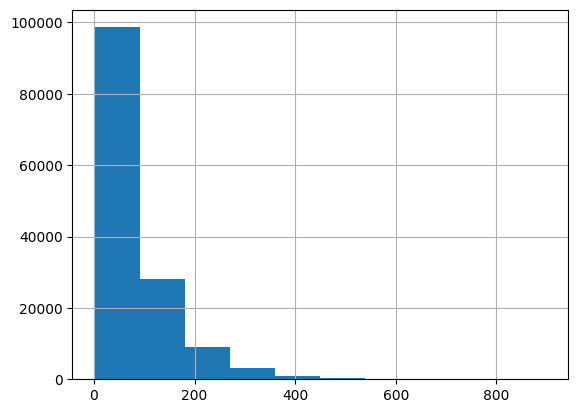

In [11]:
# PM 2.5 
all_data_df['PM2.5'].hist()
all_data_df.loc[all_data_df['PM2.5'] > 500, 'PM2.5'] = 500

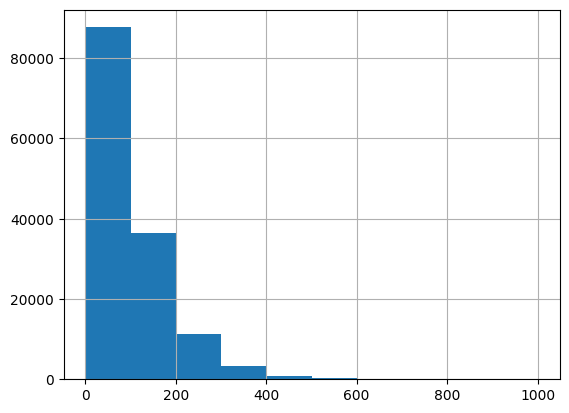

In [12]:
# PM10 
all_data_df['PM10'].hist()
all_data_df.loc[all_data_df['PM10'] > 500, 'PM10'] = 500

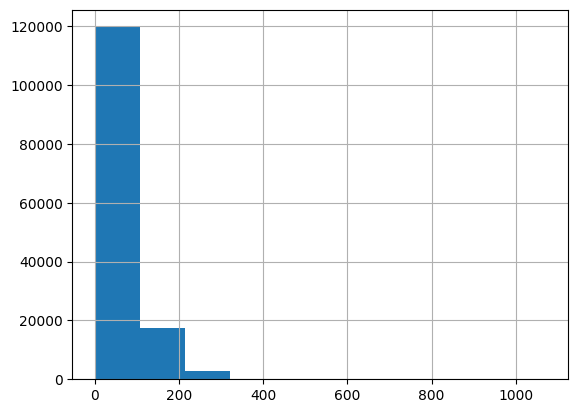

In [13]:
# O3 
all_data_df['O3'].hist()
all_data_df.loc[all_data_df['O3'] > 400, 'O3'] = 400

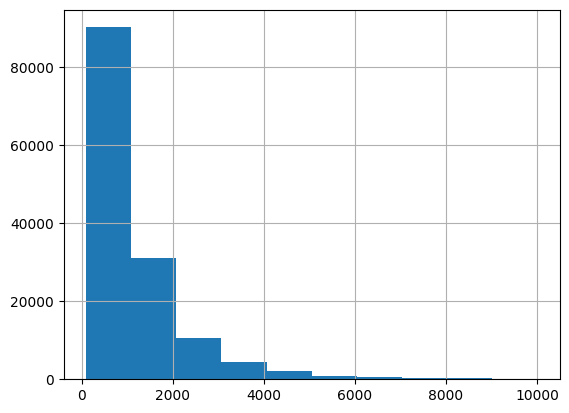

In [14]:
#CO 
all_data_df['CO'].hist()
all_data_df.loc[all_data_df['CO'] > 8000, 'CO'] = 8000

**Insight:**
- menghilangkan missing values
- memperbaiki inaccurate values

## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan :
- Di antara stasiun Aotizhongxin,Changping,Dingling,Dongsi mana yang memiliki kualitas udara terburuk dalam satu tahun terakhir berdasarkan level PM2.5?
- Di bulan apa curah hujan paling tinggi terjadi  di stasiun Aotizhongxin,Changping,Dingling,Dongsi ?

In [15]:
#memfilter data berdasarkan tahun dan station
all_data_df.groupby(["year","station"]).agg({
    "PM2.5" : ["sum","mean"],
})

PM2.5            
                        sum        mean
year station                           
2013 Aotizhongxin  604405.0   82.299156
     Changping     532787.0   72.547249
     Dingling      473717.0   64.503949
     Dongsi        633299.0   86.233524
2014 Aotizhongxin  775005.5   88.470947
     Changping     687476.3   78.479030
     Dingling      644437.6   73.565936
     Dongsi        761212.2   86.896370
2015 Aotizhongxin  710024.8   81.053059
     Changping     603654.9   68.910377
     Dingling      563425.3   64.317957
     Dongsi        755931.9   86.293596
2016 Aotizhongxin  645667.0   73.504895
     Changping     539684.0   61.439435
     Dingling      522333.0   59.464139
     Dongsi        693114.0   78.906421
2017 Aotizhongxin  132280.0   93.418079
     Changping     112656.0   79.559322
     Dingling       96578.0   68.204802
     Dongsi        142620.0  100.720339

In [16]:
all_data_df.groupby(["month","station"]).RAIN.sum()

month  station     
1      Aotizhongxin      1.0
       Changping         0.6
       Dingling          0.6
       Dongsi            1.0
2      Aotizhongxin     29.4
       Changping        14.2
       Dingling         14.2
       Dongsi           32.2
3      Aotizhongxin     27.0
       Changping        26.4
       Dingling         26.4
       Dongsi           22.8
4      Aotizhongxin     67.8
       Changping        55.1
       Dingling         55.1
       Dongsi           73.8
5      Aotizhongxin    141.1
       Changping       143.1
       Dingling        143.1
       Dongsi          134.2
6      Aotizhongxin    453.1
       Changping       313.5
       Dingling        313.5
       Dongsi          371.6
7      Aotizhongxin    795.3
       Changping       767.2
       Dingling        767.2
       Dongsi          781.1
8      Aotizhongxin    346.8
       Changping       243.9
       Dingling        243.9
       Dongsi          261.5
9      Aotizhongxin    337.9
       Changping       

**Insight:**
- diperoleh data yang siap untuk di visualisasikan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di antara stasiun Aotizhongxin,Changping,Dingling,Dongsi mana yang memiliki kualitas udara terburuk dalam satu tahun terakhir berdasarkan level PM2.5?

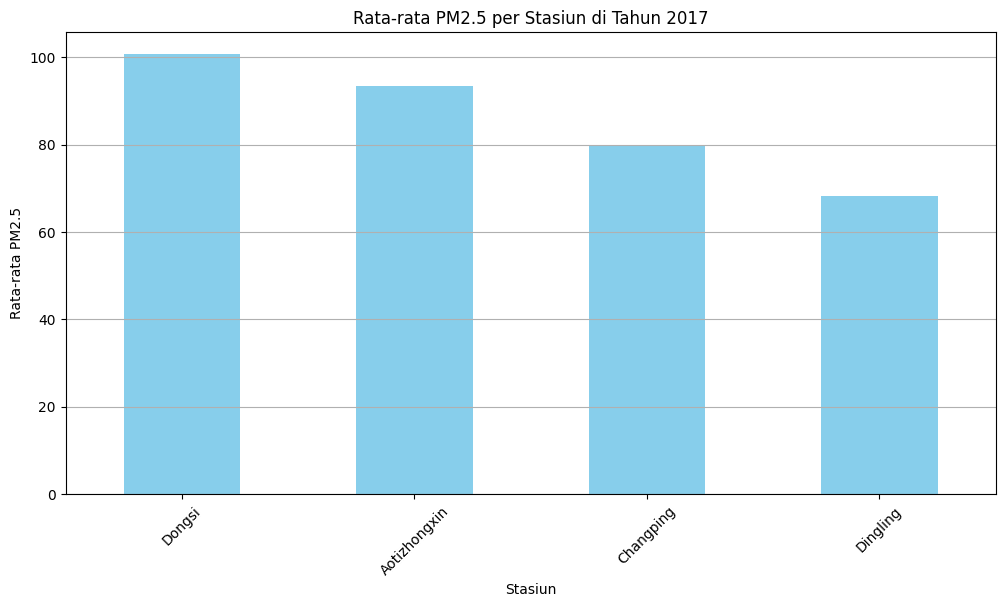

In [17]:
last_year = all_data_df['year'].max()

# Filter DataFrame untuk hanya mengambil data dari tahun terakhir
filtered_data = all_data_df[all_data_df['year'] == last_year]


PM25LastYear = filtered_data.groupby(by= "station")['PM2.5'].mean().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
PM25LastYear.plot(kind='bar', color='skyblue')
plt.title(f'Rata-rata PM2.5 per Stasiun di Tahun {last_year}')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### Pertanyaan 2: Di bulan apa curah hujan paling tinggi terjadi  di stasiun Aotizhongxin,Changping,Dingling,Dongsi ?

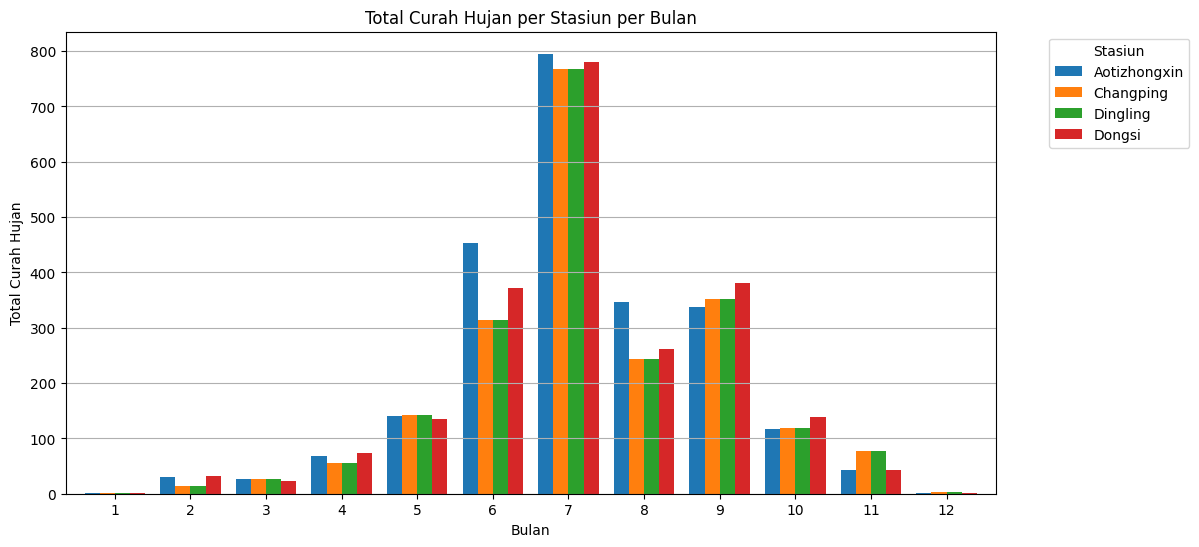

In [18]:
rain_data = all_data_df.groupby(["month", "station"])['RAIN'].sum().unstack() #unstack digunakan untuk mengubah hasil agregasi sehingga setiap stasiun menjadi kolom

rain_data.plot(kind='bar', figsize=(12, 6), width=0.8)

# Pengaturan grafik
plt.title('Total Curah Hujan per Stasiun per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Curah Hujan')
plt.xticks(rotation=0)
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.show()

**Insight:**
- visualisasi data menggunakan barchart dan multi barchart 

## Conclusion

- Di antara stasiun Aotizhongxin,Changping,Dingling,Dongsi mana yang memiliki kualitas udara terburuk dalam satu tahun terakhir berdasarkan level PM2.5? 
Jawab : Di tahun terakhir (2017) stasiun Dongsi memiliki kualitas udara terburuk berdasarkan level PM 2.5 dengan rata rata 102.04 

- Di bulan apa curah hujan paling tinggi terjadi  di stasiun Aotizhongxin,Changping,Dingling,Dongsi ? 
Jawab : Untuk semua stasiun curah hujan paling tinggi terjadi di bulan 07 (Juli) 

In [19]:
all_data_df.to_csv("data.csv", index=False)